In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Artificial Neural Networks 
 

Artificial Neutral Networks are biologically  inspired mathematical objects that use function composition to approximate any computable function.

An ANN has a structure called the network **architecture** which consists of **layers**. Each layer contain **nodes** (i.e. a neuron). The nodes are connected between layers by **links**. Each link has an associated **weight**. Each node has a **activation function**.

Processing consists of a **forward pass** and a **backward pass**.

The forward pass performs function composition from the input layer to the output layer producing an output value(s).

The backward pass starts with a **Loss** function which compares the output with the true value to calculate the **error** in the output. The error is then
propagated the backwards through the network and the weights are adjusted by **gradient descent** to minimize the error. This process is call **Back Propagation**.

There are many different types of ANNs. For regression and classification of tabular data we can use the Multilayer Perceptron.

### Multilayer Perceptron

A Multilayer Perceptron neural net consists of layers a units called **perceptrons**

![](Perceptron1.png)
$$\text{Figure 1. Rosenblatt's Perceptron}$$


![](MLP1.png)

![](DeepNN.png)

$$\text{Figure 2. Multilayer Perceptrons}$$


A Multilayed Perceptron is a **fully-connected feedforward network**. In a fully-connected feed forward network a node at each layer to connected to all the nodes in the next layer. There are no connections within a layer. The layers are an **input layer**, 1 or more **hidden layer(s)** and an **output layer**.


The input layer has m features, ${x_i, i = 1,...,m}$. One input node per feature.

Each hidden layer transforms via an **activation** function f the weighted sum of its input $a_i = f(\sum x_iw_i)$.

The width of layer is number of nodes in layer. The depth of network is number of layers.


The output layer performs the final transformation via an activation function to the target outcome. 
    

### Activation functions

#### Sigmoid (Logistic)

The sigmoid activation function adds non-linearity to the process. Its range is (0,1).

<div style="font-size: 115%;">
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$
</div>

The derivative of the sigmoid is:

<div style="font-size: 115%;">
$$ \frac{d}{dz}\sigma(z) = -(1 + e^{-z})^{-2}(-e^{-z}) =  \frac{1}{1 + e^{-z}}\left(1 - \frac{1}{1 + e^{-z}}\right) =  \sigma(z)(1 - \sigma(z))$$
</div>

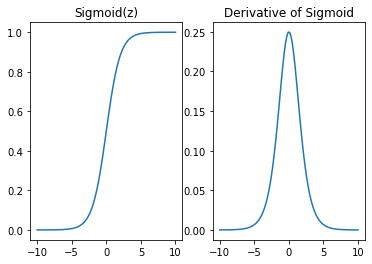

In [2]:
def Sigmoid(z):
    return 1/(1+np.exp(-z))
# Derivative of Sigmoid or Logistic function
def D_Sigmoid(z): 
    s = Sigmoid(z)
    return s * (1 - s)
z = np.linspace(-10,10,100)
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(z,Sigmoid(z))
ax1.set_title('Sigmoid(z)')
ax2.plot(z,D_Sigmoid(z))
ax2.set_title('Derivative of Sigmoid');

In the plot above the function is very steep in the domain (-3, +3) pushing y values to the extremes,which is good for classification.

Outside of (-3,+3) gradient is very small (i.e. it vanishes).

Since the range of the sigmoid is (0,1) it is not symmetric around 0. It produces only positive outputs which is not always desirable.

#### Hyperbolic Tangent

The hyperbolic tangent is scaled version of the sigmoid with a range (-1,1), which is symmetric about the origin, thus allowing negative output.

<div style="font-size: 115%;">
$$ tanh(z) = \frac{sinh(z)}{cosh(z)} = \frac{e^z - e^{-z}}{e^z + e^{-z}} = \frac{2}{1 + e^{-2z}} - 1$$
</div>

Its derivative is:

<div style="font-size: 115%;">
$$ \frac{d}{dz}tanh(z) = 1 - tanh^2(z)$$
</div>

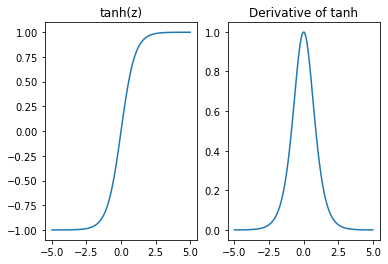

In [3]:
def tanh(z):
    return (np.e**z - np.e**(-z))/(np.e**z + np.e**(-z))

def D_tanh(z):
    return (1 - tanh(z)**2)

z = np.linspace(-5,5,100)
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(z,tanh(z))
ax1.set_title('tanh(z)')
ax2.plot(z,D_tanh(z))
ax2.set_title('Derivative of tanh');

As can be seen in the plot above the hyperbolic tangent like the sigmoid has a vanishing gradient.
    

#### Rectified Linear Unit (ReLU)

The ReLU is the most used activation function for hidden layers because it does not have a vanishing gradient and is easy to compute.

<div style="font-size: 115%;">
$$ ReLU = max(0,z)$$

$$ \frac{d}{dz}ReLU(z) = 1 \text{ if } z > 0 \text{ else } 0 $$
</div>

It is non-linear but does not saturate for large positive values.


The derivative is 0 or 1. If gradient = 1 then doesn't vanish when multiplied together. If gradient = 0 then the weights will not be updated during backpropation.

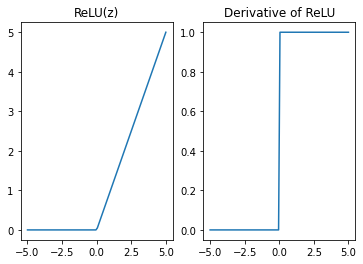

In [4]:
def ReLU(z):
    return z * (z > 0)

def D_ReLU(z):
    return 1 * (z > 0)

z = np.linspace(-5,5,100)
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(z,ReLU(z))
ax1.set_title('ReLU(z)')
ax2.plot(z,D_ReLU(z))
ax2.set_title('Derivative of ReLU');

#### Leaky ReLU

The Leaky RelU is an improved version of ReLU, solves the problem of updating the weights for inputs less than zero. It replaces the horizontal part of the function with a non-zero non-horizontal line.

<div style="font-size: 115%;">
$$ LeakyReLU =  a*z \text{ if } z < 0 \text{ else } z$$
$$ \frac{d}{dz}LeakyReLU(z) = 1 \text{ if } z > 0 \text{ else } a $$
</div>   
    

[-5.00000000e-02 -4.47368421e-02 -3.94736842e-02 -3.42105263e-02
 -2.89473684e-02 -2.36842105e-02 -1.84210526e-02 -1.31578947e-02
 -7.89473684e-03 -2.63157895e-03  2.63157895e-01  7.89473684e-01
  1.31578947e+00  1.84210526e+00  2.36842105e+00  2.89473684e+00
  3.42105263e+00  3.94736842e+00  4.47368421e+00  5.00000000e+00]


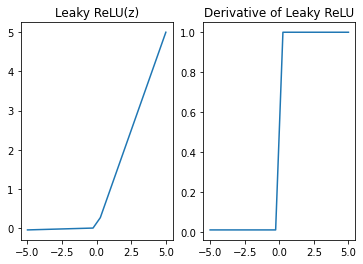

In [5]:
def L_ReLU(z, a = 0.01):
    return np.concatenate((a*z[z<0],z[z>= 0]))

def D_L_ReLU(z, a = 0.01):
    return np.concatenate((a * np.ones(len(z[z<0])), np.ones(len(z[z>= 0]))))

z = np.linspace(-5,5,20)
print(L_ReLU(z))
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(z,L_ReLU(z))
ax1.set_title('Leaky ReLU(z)')
ax2.plot(z,D_L_ReLU(z))
ax2.set_title('Derivative of Leaky ReLU');

There are several other variations of the basic ReLU. See:

https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

#### Softmax

The softmax is as the output activaton in multiclass classification. It outputs the probability that the input belongs to a particular class:

#### for j = 1.2,...,k

<div style="font-size: 115%;">
$$ Softmax(z)_j =S(z)_j = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}} $$
</div>

Its derivative is:

$$\frac{d}{dz}S(z)_j = S(z)_j(\delta_{jk} - S(z)_k)$$

$$ \delta \text{ is the Kronecker delta function}$$


In [6]:
z  = np.array([1.5,3.2,.75] )

def Softmax(z):
    ez = np.e**z
    return ez/np.sum(ez)
s = Softmax(z)
print(f'Softmax(z) = {s}')   
np.sum(s)

Softmax(z) = [0.14396124 0.78803628 0.06800248]


1.0

### Backward Pass: Learning the weights

To learn the weights, we first calculate the Loss (i.e. Error, Cost) at the end of the forward pass and then propagate the error backwards though the layers to the input.

Changing (i.e. updating) the weights is the only way to affect the loss. We use gradient descent to update the weights in neural networks.

Gradient descent minimizes the loss function by iteratively moving in the direction of the negative of the gradient. 

We training the network by repeatedly propagating the error backwards and adjusting the weights until the loss is within some tolerance.

#### Loss Functions

The Loss function is the function to be minimized during training. It is a function of the output value and target value.

The most common lost Loss functions are:

* Squared error which is used in Linear Regression.

* Cross-entropy loss (log loss): 

$$-(ylog(p) + (1-y)(log(1-p))$$

Cross-entropy loss measures the performance of a classification model that outputs a probability. It increases as the predicted probability diverges from the actual label.

In [7]:
def BinaryCrossEntropy(p, y):
    if y == 1:
      return -log(p)
    else:
      return -log(1 - p)


#### Backpropagation and Gradient Descent 

There are three type of Gradient Descent:

- **Batch** - Update all trials (observations) each epoch
- **Stochastic** - randomly select one observation to update each epoch
- **Mini Batch** - Choose a batch (e.g.32) observations to update each epoch
    

### Mathematics of Backprop and gradient descent for a  simple Neural Network

For illustrative purposes using 1 Hidden layer of width 1 with sigmoid activation function for hidden and output layers

![](Simple_NN1.png)

Dot Product: Multiply vectors to get a scalar

<div style="font-size: 110%;">
$$  x = (x_1,x_2,...,x_n), w = (w_1,w_2,...,w_n)$$
</div>    

<div style="font-size: 110%;">
$$  x\centerdot{ w} = \sum_i^n x_i*w_i $$
</div>

Loss Function: L = $\frac{1}{2}(Y - y_{out})^2$  

Derivative of Loss Function: $D(L) = -(Y - y_{out})$

Sigmoid Function: $\sigma(z) = \frac{1}{1 + e^{-z}}$

Derivative of Sigmoid: $D(\sigma(z)) = \sigma(z)(1 - \sigma(z))$

<div style="font-size: 125%;">

$$h_{in} = X \cdot w_1,\text{ } h_{out} = \sigma(h_{in})$$

$$y_{in} = h_{out} \cdot w_2,\text{ } y_{out} = \sigma(y_{in})$$

</div>

#### Updating the weights (Gradient Descent)

$\gamma$ is the learning rate

<div style="font-size: 125%;">
$$ w_1^{(t)} = w_1^{(t-1)} - \gamma\frac{\partial{L}}{\partial{w_1^{(t-1)}}}$$
$$ w_2^{(t)} = w_2^{(t-1)} - \gamma\frac{\partial{L}}{\partial{w_2^{(t-1)}}}$$
</div>

#### Partial derivative of the Loss with respect to (wrt) the weights

We make heavy use of chain rule.

Weight for Output Layer

<div style="font-size: 125%;">
$$\frac{\partial{L}}{\partial{w_2}} = \frac{\partial{L}}{\partial{y_{out}}}\frac{\partial{y_{out}}}{\partial{y_{in}}} \frac{\partial{y_{in}}}{\partial{w_2}} = -(Y - y_{out})(y_{out}(1 - y_{out}))h_{out}$$
</div>

Weight for Hidden Layer

<div style="font-size: 125%;">
$$\frac{\partial{L}}{\partial{w_1}} = \frac{\partial{L}}{\partial{y_{out}}}\frac{\partial{y_{out}}}{\partial{y_{in}}} \frac{\partial{y_{in}}}{\partial{h_{out}}} \frac{\partial{h_{out}}}{\partial{h_{in}}} \frac{\partial{h_{in}}}{\partial{w_1}} =  -(Y - y_{out})(y_{out}(1 - y_{out}))w_2(h_{out}(1 - h_{out}))X$$
</div>

In [8]:
import numpy as np

# Activation functions and derivatives
#   Sigmoid or Logistic function
def Sigmoid(z):
    return 1/(1+np.exp(-z))
# Derivative of Sigmoid or Logistic function
def D_Sigmoid(z): 
    s = Sigmoid(z)
    return s * (1 - s)
#
# Loss Function
def Loss(y,yhat):
    return (1/2)*(y - yhat)**2

def D_Loss(y, yhat):
    return -(y - yhat)

# Dot Product
def Dot(x,w):
    return np.dot(x,w)

def D_Dot(x,w):
    return x


![](Simple_NN1.png)



<div style="font-size: 115%;">
$$\sigma(W_2\cdot{\sigma(W_1\cdot{X})})$$
    </div>

In [ ]:
def One_Epoch(w_1,w_2,X,Y):
    
    # Proprogate Forward
    h_in = Dot(X,w_1)
    h_out = Sigmoid(h_in)
    y_in = Dot(h_out,w_2)
    y_out = Sigmoid(y_in)
    
    # Backpropagation
        
    # Calculate the change in the error due to the weight in the second layer
        # D_Loss(Y, y_out) =  -(Y - y_out)* 
        # D_Sigmoid(y_in) =  (y_out(1 - y_out))
    delta_y = -(Y - y_out) * (y_out * (1 - y_out))
        # D_Dot(h_out,w_2) = h_out
    error_w2 = h_out.T.dot(delta_y) 
    #print(delta_y.shape,h_out.shape,error_w2.shape)
        # Calculate the change in the error due to the weight in weights in the first layer
        # D_Dot(w_2, y_in) = w_2   
        # D_Sigmoid(h_in) = h_out(1 - h_out) 
    delta_h = delta_y.dot(w_2.T) * (h_out * (1 - h_out))
        # D_Dot(X,w_1) = X       
    
    error_w1 = X.T.dot(delta_h)
    #print(delta_h.shape,X.shape,error_w1.shape)
    
    # Update weights
    w_2 = w_2 - gamma * error_w2
    w_1 = w_1 - gamma * error_w1
    return w_1,w_2, y_out        
    

#### One sample,  three features, single output

![](NN1.png)

In [ ]:
np.random.seed(42)

# Data: 1 trial, 3 features
X = np.array([[.2, .4, .6]])
Y = np.array([[.8]])

# Weight Matricies
w_1 = 2*np.random.random((3,1)) - 1
w_2 = 2*np.random.random((1,1)) - 1

Max_Epoch = 2000
tolerance = 0.001 
gamma = 80
Converged = np.isclose(Y,0,tolerance)
cnt = 0 

In [ ]:
while (not Converged.all()) and (cnt < Max_Epoch):
    cnt += 1
    w_1,w_2,y = One_Epoch(w_1,w_2,X,Y)
    # Check if Converged
    Converged = np.isclose(Y,y,tolerance)
    
mse = np.mean((Y - y)**2) 
print(f"Output: {y} MSE: {mse}  Epoch {cnt}")
    
    

### Batch Gradient Descent

In [ ]:
np.random.seed(42)
# 4 trials, 3 features
X = np.array([[.2, .4, .6],   
              [.3, .3, .1],
              [.5, .4, .7],
              [.8, .4, .1]])
N = X.shape[0]
Y = np.array([[.8],[.2], [.4], [.6]])
w_1 = 2*np.random.random((3,N)) - 1
w_2 = 2*np.random.random((N,1)) - 1

gamma = 50
tolerance = 0.001
Max_Epoch = 40000
Converged = np.isclose(Y,0)
cnt = 0 

while (not Converged.all()) and (cnt < Max_Epoch):
    cnt += 1
    w_1,w_2,y = One_Epoch(w_1,w_2,X,Y)
    # Check if Converged
    Converged = np.isclose(Y,y,tolerance)
    
mse = np.mean((Y - y)**2) 
print(f"Output: \n {y} \n \n MSE: {mse}  Epoch {cnt}")



### Stochastic Gradient Descent

In [ ]:
np.random.seed(42)
trials = np.random.permutation(range(4))
print("Trials: ", trials)

Data = np.array([[.2, .4, .6],
              [.3, .3, .1],
              [.5, .4, .7],
              [.8, .4, .1]])

Labels = np.array([[.8],[.2], [.4], [.6]])

w_1 = 2*np.random.random((3,1)) - 1
w_2 = 2*np.random.random((1,1)) - 1

gamma = 80

for tr in trials:
    X = Data[tr,:].reshape(1,-1)
    Y = Labels[tr,:].reshape(1,1)
    
    tolerance = 0.001
    Max_Epoch = 40000
    Converged = np.isclose(Y,0)
    cnt = 0 

    while (not Converged.all()) and (cnt < Max_Epoch):
        cnt += 1
        w_1,w_2,y = One_Epoch(w_1,w_2,X,Y)
        # Check if Converged
        Converged = np.isclose(Y,y,tolerance)
    
    mse = np.mean((Y - y)**2) 
    print(f"Trial {tr} \n Output: \n {y} \n \n MSE: {mse}  Epoch {cnt}")

    